In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worlds-best-restaurants/WorldsBestRestaurants.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
file_path = '/kaggle/input/worlds-best-restaurants/WorldsBestRestaurants.csv'  # Replace with the correct path in your notebook
df = pd.read_csv(file_path)


"Explore the Dataset"

In [3]:
# 1. Identify missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# 2. Check data types
data_types = df.dtypes
print("\nData types for each column:")
print(data_types)

# 3. Basic statistical analysis
basic_stats = df.describe()
print("\nBasic statistics:")
print(basic_stats)

# 4.Get the size of the dataset
rows, columns = df.shape

print(f"\nNumber of rows: {rows}")
print(f"Number of columns: {columns}")

Missing values per column:
year          0
rank          0
restaurant    0
location      0
country       0
lat           0
lng           0
dtype: int64

Data types for each column:
year            int64
rank            int64
restaurant     object
location       object
country        object
lat           float64
lng           float64
dtype: object

Basic statistics:
              year         rank          lat          lng
count  1050.000000  1050.000000  1050.000000  1050.000000
mean   2012.142857    25.490476    35.231239     0.070343
std       6.276788    14.432130    24.690886    61.607445
min    2002.000000     1.000000   -38.336369  -122.870051
25%    2007.000000    13.000000    35.824923    -3.737738
50%    2012.000000    25.000000    43.318237     2.351377
75%    2017.000000    38.000000    48.857548    12.568337
max    2023.000000    50.000000    63.843390   151.209295

Number of rows: 1050
Number of columns: 7


"There are no null values or duplicate rows, so we will proceed with data visualization."

In [4]:
# Count the number of restaurants per country over time
restaurants_by_country = df['country'].value_counts()

# Display the results
print("Countries with the most restaurants in the ranking over time:")
print(restaurants_by_country)

Countries with the most restaurants in the ranking over time:
country
United States           145
France                  141
Spain                   114
United Kingdom          103
Italy                    84
Germany                  47
Japan                    34
Australia                32
Peru                     29
Denmark                  29
Mexico                   27
Sweden                   24
Brazil                   21
Belgium                  20
Thailand                 19
South Africa             18
Singapore                18
Netherlands              16
Hong Kong                16
Austria                  14
Russia                    9
Monaco                    8
Chile                     8
Switzerland               7
China                     7
Portugal                  7
Argentina                 7
Finland                   5
Slovenia                  5
India                     5
Colombia                  5
United Arab Emirates      5
Barbados                  4
Norway

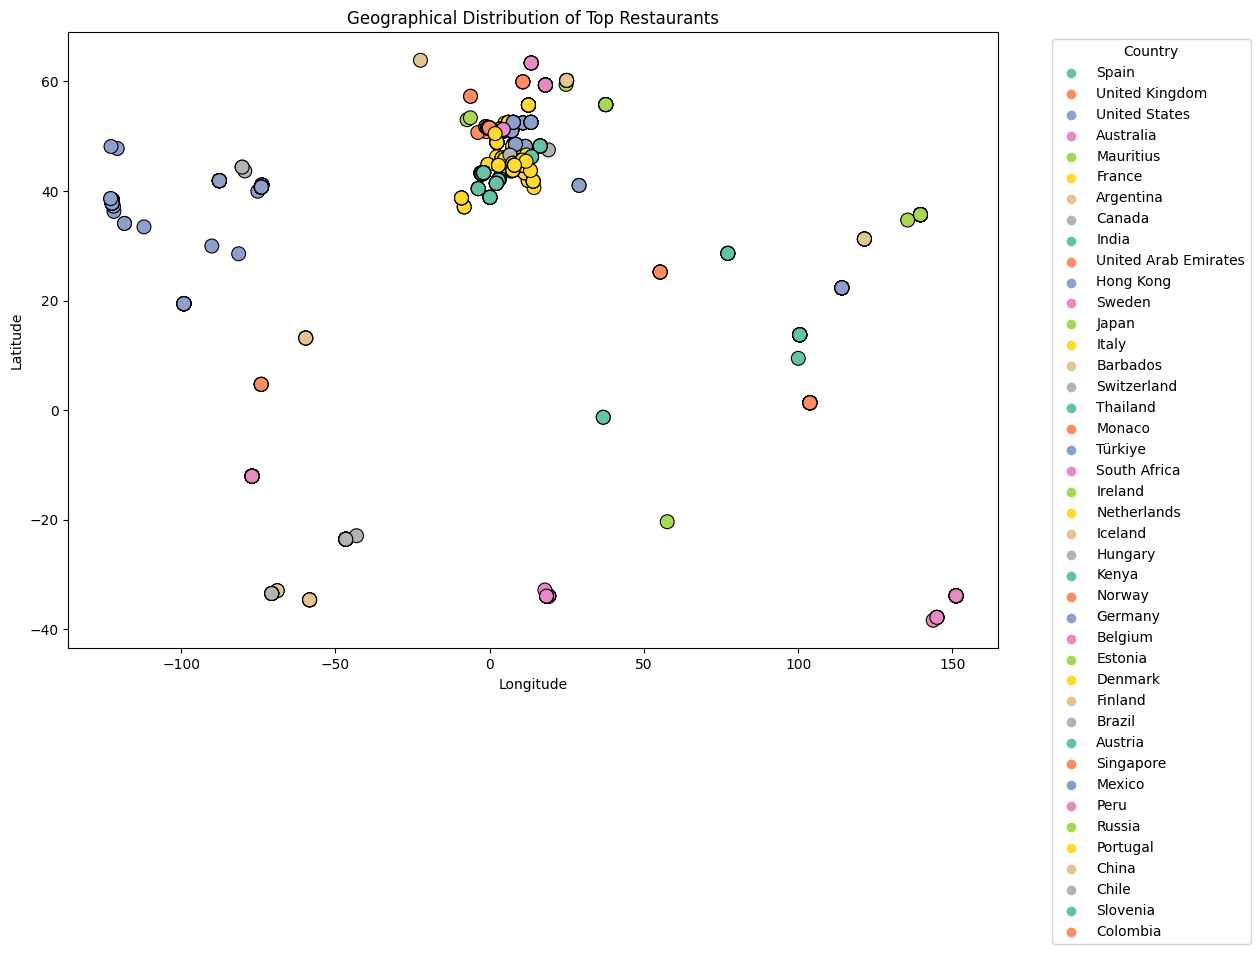

In [5]:
# Plot the geographic distribution of the restaurants (latitude and longitude)
plt.figure(figsize=(12, 8))

# Use a scatter plot to display the location of restaurants, adding a legend for countries
scatter_plot = sns.scatterplot(x='lng', y='lat', hue='country', data=df, palette='Set2', s=100, edgecolor='black')

# Add title and labels
plt.title('Geographical Distribution of Top Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust the legend to avoid overlapping with the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')

# Show the plot
plt.show()

In [6]:
# Group the data by country and year, then calculate the average ranking for each combination
avg_ranking_per_country_year = df.groupby(['country', 'year'])['rank'].mean().reset_index()

# Calculate the difference in average ranking over the years for each country
# Sort the results by the amount of change (improvement or worsening)
country_ranking_change = avg_ranking_per_country_year.groupby('country')['rank'].agg(['first', 'last']).reset_index()

# Add a new column showing the change in ranking (last - first)
country_ranking_change['ranking_change'] = country_ranking_change['last'] - country_ranking_change['first']

# Sort by the countries that improved the most (negative change means improvement, positive means worsening)
country_ranking_change_sorted = country_ranking_change.sort_values(by='ranking_change')

# Display the top 5 countries that improved and worsened the most
print("Top 5 countries that improved the most in average ranking:")
print(country_ranking_change_sorted.head(5))

print("\nTop 5 countries that worsened the most in average ranking:")
print(country_ranking_change_sorted.tail(5))

Top 5 countries that improved the most in average ranking:
      country  first       last  ranking_change
5      Brazil   50.0  12.000000      -38.000000
31  Singapore   45.0  14.000000      -31.000000
10    Denmark   33.0   5.000000      -28.000000
24     Mexico   46.0  23.666667      -22.333333
28       Peru   42.0  20.500000      -21.500000

Top 5 countries that worsened the most in average ranking:
        country  first  last  ranking_change
36  Switzerland   29.0  47.0            18.0
3      Barbados   25.0  46.0            21.0
18        India   14.0  37.0            23.0
4       Belgium   14.5  39.0            24.5
15    Hong Kong   18.0  50.0            32.0


In [7]:
# Count the number of appearances for each restaurant
restaurant_participations = df['restaurant'].value_counts()

# Calculate the average number of participations
average_participations = restaurant_participations.mean()

# Display the result
print(f"The average number of participations of restaurants in the ranking is: {average_participations:.2f}")


The average number of participations of restaurants in the ranking is: 4.09


In [8]:
# Find the first year of appearance for each country and city
first_appearance = df.groupby(['country', 'location'])['year'].min().reset_index()

# Find the most recent year in the dataset
most_recent_year = df['year'].max()

# Filter the countries and cities that appeared for the first time in the most recent year
recent_entries = first_appearance[first_appearance['year'] == most_recent_year]

# Display the result
print(f"Countries and cities that first appeared in the ranking in {most_recent_year}:")
print(recent_entries)


Countries and cities that first appeared in the ranking in 2023:
                  country                     location  year
28                 France  La Madelaine-sous-Montreuil  2023
111  United Arab Emirates                       Dubai   2023


In [9]:
# Sort the dataset by restaurant and year for proper comparison
df_sorted = df.sort_values(by=['restaurant', 'year'])

# Calculate the difference in ranking between consecutive years for each restaurant
df_sorted['rank_change'] = df_sorted.groupby('restaurant')['rank'].diff()

# Find the restaurants with the biggest rise (positive change) and biggest fall (negative change)
biggest_rise = df_sorted.sort_values(by='rank_change', ascending=False).head(5)
biggest_fall = df_sorted.sort_values(by='rank_change', ascending=True).head(5)

# Display the results
print("Restaurants with the biggest rise in ranking between consecutive years:")
print(biggest_rise[['restaurant', 'year', 'rank', 'rank_change']])

print("\nRestaurants with the biggest fall in ranking between consecutive years:")
print(biggest_fall[['restaurant', 'year', 'rank', 'rank_change']])

Restaurants with the biggest rise in ranking between consecutive years:
                       restaurant  year  rank  rank_change
248                Comme Chez Soi  2006    49         42.0
94                           1884  2003    45         38.0
744   Dinner by Heston Blumenthal  2016    45         38.0
948                     Azurmendi  2021    49         35.0
1040                  Le Calandre  2023    41         31.0

Restaurants with the biggest fall in ranking between consecutive years:
                         restaurant  year  rank  rank_change
760        Blue Hill at Stone Barns  2017    11        -37.0
614                         Central  2014    15        -35.0
762  Alain Ducasse au Plaza Athénée  2017    13        -34.0
407                          Daniel  2010     8        -33.0
115                         St John  2004    16        -33.0


In [10]:
# Group the data by country and calculate the average ranking for each country
avg_ranking_per_country = df.groupby('country')['rank'].mean().reset_index()

# Sort the countries by average ranking (ascending order means better rank)
best_avg_ranking = avg_ranking_per_country.sort_values(by='rank', ascending=True).head(5)
worst_avg_ranking = avg_ranking_per_country.sort_values(by='rank', ascending=False).head(5)

# Display the results
print("Countries with the best average ranking:")
print(best_avg_ranking)

print("\nCountries with the worst average ranking:")
print(worst_avg_ranking)


Countries with the best average ranking:
      country       rank
23  Mauritius   5.000000
11    Estonia  15.000000
2     Austria  15.500000
25     Monaco  16.750000
10    Denmark  17.034483

Countries with the worst average ranking:
     country  rank
22     Kenya  48.5
16   Hungary  46.0
17   Iceland  44.0
9   Colombia  43.8
27    Norway  41.5


In [11]:
# Calculate the number of restaurants for each country
restaurant_count_per_country = df['country'].value_counts().reset_index()
restaurant_count_per_country.columns = ['country', 'restaurant_count']

# Calculate the average ranking for each country
avg_ranking_per_country = df.groupby('country')['rank'].mean().reset_index()

# Merge the two DataFrames: restaurant count and average ranking
country_analysis = pd.merge(restaurant_count_per_country, avg_ranking_per_country, on='country')

# Display the merged data
print("Relationship between the number of restaurants and average ranking per country:")
print(country_analysis)

Relationship between the number of restaurants and average ranking per country:
                 country  restaurant_count       rank
0          United States               145  24.682759
1                 France               141  24.106383
2                  Spain               114  17.175439
3         United Kingdom               103  24.776699
4                  Italy                84  27.761905
5                Germany                47  34.191489
6                  Japan                34  25.764706
7              Australia                32  26.375000
8                   Peru                29  18.448276
9                Denmark                29  17.034483
10                Mexico                27  24.407407
11                Sweden                24  29.708333
12                Brazil                21  24.047619
13               Belgium                20  31.300000
14              Thailand                19  24.894737
15          South Africa                18  37.333333
16

In [12]:
# Filter the dataset for restaurants that ranked in the top 10
top_10_restaurants = df[df['rank'] <= 10]

# Count the number of times each restaurant has appeared in the top 10
top_10_counts = top_10_restaurants['restaurant'].value_counts().reset_index()
top_10_counts.columns = ['restaurant', 'top_10_count']

# Sort by the most appearances in the top 10
top_10_counts_sorted = top_10_counts.sort_values(by='top_10_count', ascending=False)

# Display the restaurants with the most top 10 appearances
print("Restaurants with the most appearances in the top 10:")
print(top_10_counts_sorted)

Restaurants with the most appearances in the top 10:
                                  restaurant  top_10_count
0                                   Mugaritz            14
1                                       Noma            11
2                      El Celler de Can Roca            10
3                                   El Bulli             9
4                                      Arzak             9
5                        Osteria Francescana             9
6                               The Fat Duck             8
7                                     Per Se             8
8                        Eleven Madison Park             7
9                         The French Laundry             7
10                                   Central             7
11                          Asador Etxebarri             7
12                           Pierre Gagnaire             6
17                                     Maido             5
16                                    Alinea             5
15 

ahora vamos a crear algunos mapas que luego completaremos con Power BI para hacer la informacion mas facil de entender.

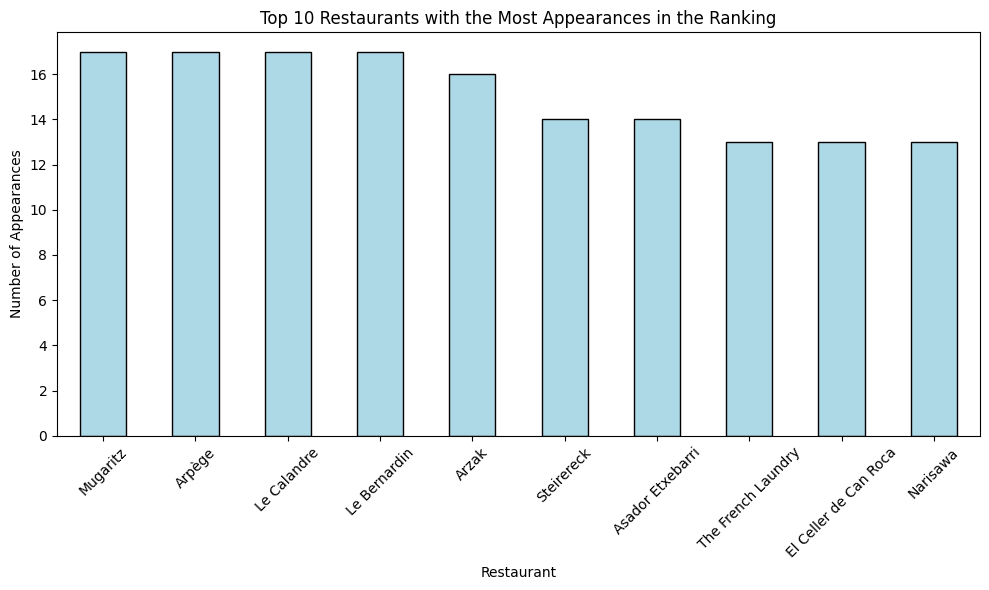

In [13]:
# Assuming df is the dataframe that contains the 'restaurant' column
# Count the number of appearances for each restaurant
top_10_restaurants = df['restaurant'].value_counts().head(10)

# Create a bar plot for the top 10 restaurants
plt.figure(figsize=(10, 6))
top_10_restaurants.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.title('Top 10 Restaurants with the Most Appearances in the Ranking')
plt.xlabel('Restaurant')
plt.ylabel('Number of Appearances')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()